In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Lecture des données


In [2]:
data1 = pd.read_csv('./steam.csv')
data1 = data1[:2000]
data1.shape

(2000, 5)

In [3]:
data1.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


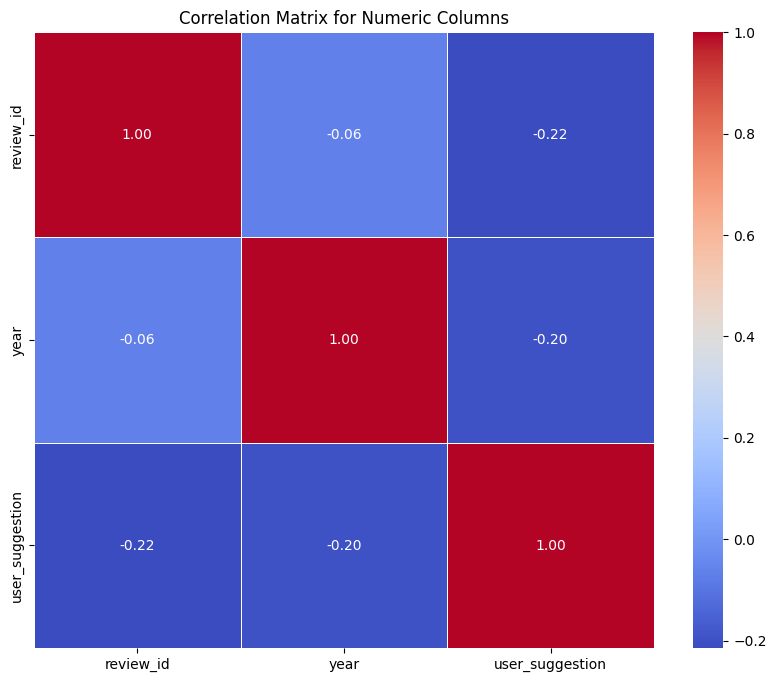

In [4]:
corr = data1[data1.select_dtypes(include=['int64', 'float64']).columns.tolist()].corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

## Analyse des données

In [5]:
counts_user_suggestion = data1['user_suggestion'].value_counts()
print(counts_user_suggestion)
percentages = (counts_user_suggestion/counts_user_suggestion.sum() *100)
print(percentages)

user_suggestion
1    1549
0     451
Name: count, dtype: int64
user_suggestion
1    77.45
0    22.55
Name: count, dtype: float64


Mauvais équilibrage des données, beaucoup plus de suggestions positives que négatives

Les colonnes review_id, title et year ne sont pas utiles pour la détermination de la suggestion d'un utilisateur.

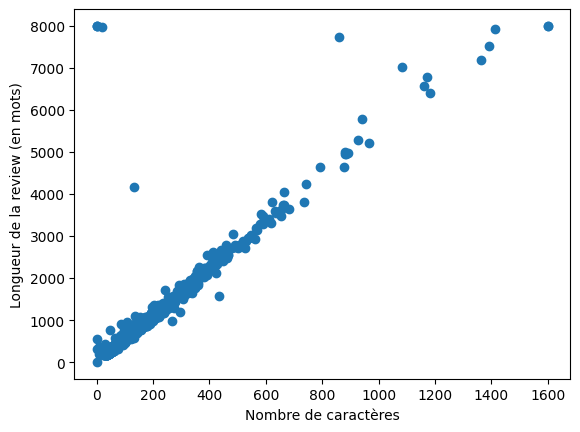

In [6]:
data1 = data1.drop(columns={'review_id', 'title', 'year'})

data1["words_count"] = data1["user_review"].str.split().str.len()

data1["user_review_lenght"] = data1["user_review"].str.len()

plt.scatter(data1["words_count"], data1["user_review_lenght"])
plt.xlabel("Nombre de caractères")
plt.ylabel("Longueur de la review (en mots)")
plt.show()

In [7]:
# Calcul du nombre de mot min, max, moyenne et médiane
min_words = data1['words_count'].min()
max_words = data1['words_count'].max()
mean_words = data1['words_count'].mean()
median_words = data1['words_count'].median()
print("Statistiques sur le nombre de mots :")
print("Min : ", min_words)
print("Max : ", max_words)
print("Moyenne : ", mean_words)
print("Médiane : ", median_words)

Statistiques sur le nombre de mots :
Min :  1
Max :  1600
Moyenne :  120.376
Médiane :  74.0


Au moins un commentaire comporte un nombre de mot égal à 1 -> questionnement sur la pertinence du commentaire en question

In [8]:
# Affichage des commentaires ayant seulement 1 mot
df_one_word_reviews = data1[data1['words_count'] == 1]
print(df_one_word_reviews)

                                           user_review  user_suggestion  \
77   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...                1   
183  NOPE.NOPE.NOPE.NOPE.NOPE.NOPE.NOPE.NOPE.NOPE.N...                1   
215  ░░░░░░░░░░░░░░░░░░░░░░█████████░░███████░░░░░░...                1   
449  AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...                1   
992                                             #NAME?                1   

     words_count  user_review_lenght  
77             1                8000  
183            1                8000  
215            1                 562  
449            1                8000  
992            1                   6  


Les lignes dont les commentaires comportent un seul mot pourront être écartées.

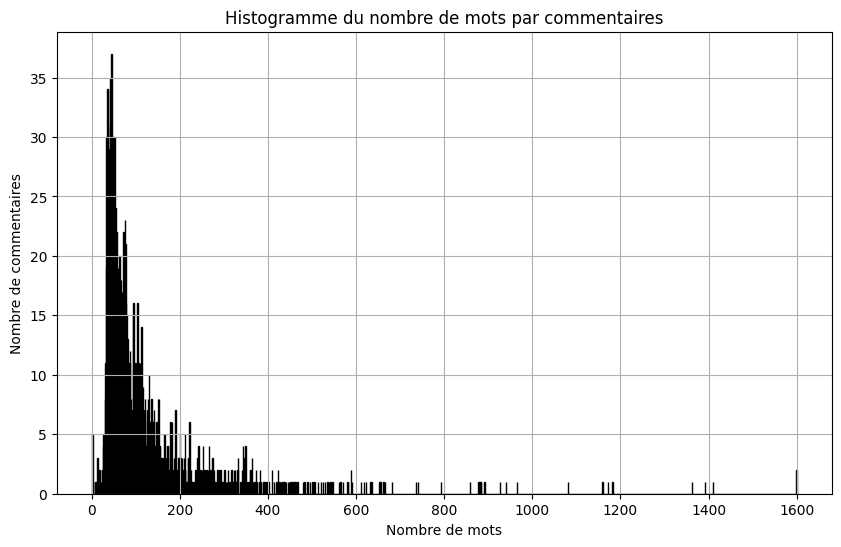

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(data1['words_count'], bins=1600, color='skyblue', edgecolor='black')
plt.xlabel('Nombre de mots')
plt.ylabel('Nombre de commentaires')
plt.title('Histogramme du nombre de mots par commentaires')
plt.grid(True)
plt.show()

La majorité des commentaires comportent un nombre de mots inférieur à 200.

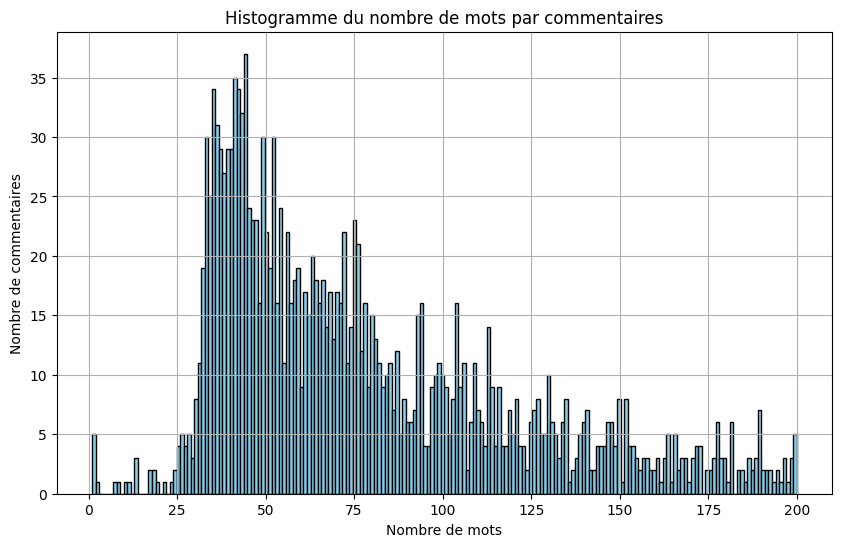

In [10]:
import matplotlib.pyplot as plt

df_less_than_two_hundred_words_reviews = data1[data1['words_count'] <= 200]

plt.figure(figsize=(10,6))
plt.hist(df_less_than_two_hundred_words_reviews['words_count'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Nombre de mots')
plt.ylabel('Nombre de commentaires')
plt.title('Histogramme du nombre de mots par commentaires')
plt.grid(True)
plt.show()

La majorité des commentaires comportent entre 25 et 75 mots.

## Nettoyage des données

In [11]:

data1["user_review"] = data1["user_review"].str.lower()

data1 = data1.dropna(how="all")
data1 = data1.drop_duplicates()

data1

,user_review,user_suggestion,words_count,user_review_lenght
0,i'm scared and hearing creepy voices. so i'll...,1,132,710
1,"best game, more better than sam pepper's youtu...",1,44,335
2,"a littly iffy on the controls, but once you kn...",1,70,397
3,"great game, fun and colorful and all that.a si...",1,47,280
4,not many games have the cute tag right next to...,1,67,334
...,...,...,...,...
1995,best moba i've ever come across and trust me o...,1,58,274
1996,i have been using several russian language sim...,1,71,397
1997,be aware that the community in this game is ma...,0,37,192
1998,let me tell u guys the truth of dotaim one of ...,0,331,1743


### Suppression des lignes ou les commentaires sont trop court ou trop long
On a fixé une limite de caractères comprises entre 100 et 500  

In [12]:
data1 = data1.query("user_review_lenght >= 100 and user_review_lenght <= 500")
data1

,user_review,user_suggestion,words_count,user_review_lenght
1,"best game, more better than sam pepper's youtu...",1,44,335
2,"a littly iffy on the controls, but once you kn...",1,70,397
3,"great game, fun and colorful and all that.a si...",1,47,280
4,not many games have the cute tag right next to...,1,67,334
5,"early access reviewit's pretty cute at first, ...",1,32,209
...,...,...,...,...
1992,judging by the fact that i managed to play 14 ...,0,41,201
1995,best moba i've ever come across and trust me o...,1,58,274
1996,i have been using several russian language sim...,1,71,397
1997,be aware that the community in this game is ma...,0,37,192


## Suppression des données qui ne sont pas en anglais

In [13]:
from langdetect import detect

def detect_language(review):
    try: 
        return detect(review)
    except:
        return "unknown"
    

data1['language'] = data1['user_review'].apply(detect_language)
data1 = data1[data1['language'] == "en"]
data1 = data1.drop(columns=['language'])
print(data1.head())

                                         user_review  user_suggestion  \
1  best game, more better than sam pepper's youtu...                1   
2  a littly iffy on the controls, but once you kn...                1   
3  great game, fun and colorful and all that.a si...                1   
4  not many games have the cute tag right next to...                1   
5  early access reviewit's pretty cute at first, ...                1   

   words_count  user_review_lenght  
1           44                 335  
2           70                 397  
3           47                 280  
4           67                 334  
5           32                 209  


/tmp/ipykernel_16156/4107550701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['language'] = data1['user_review'].apply(detect_language)


## NLTK

In [29]:
import nltk

# Téléchargement des modules nécessaires
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Tokenisation des reviews
reviews = data1["user_review"].tolist()
tokenized_reviews = [nltk.word_tokenize(review) for review in reviews]
print(tokenized_reviews)

# Lemmatisation et suppression des mots vides
lemmatizer = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
processed_reviews = [[lemmatizer.lemmatize(word) for word in review if word not in stopwords] for review in tokenized_reviews]

[nltk_data] Downloading package stopwords to /home/sophie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sophie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sophie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/sophie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['best', 'game', ',', 'more', 'better', 'than', 'sam', 'pepper', "'s", 'youtube', 'account', '.', '10/10what', 'you', "'ll", 'need', 'to', 'play', ':', 'a', 'computersome', 'extra', 'pants.pros', ':', 'scary', 'as', 'hell.fun.adventure.spooky.did', 'i', 'forgot', 'to', 'mention', 'that', 'its', 'scary', 'as', 'hell', '?', 'you', "'ll", 'get', 'more', 'pants/briefs', 'in', 'your', 'wardrobe.time', 'consuming', 'if', 'you', "'re", 'bored.cons', ':', 'buying', 'pants/briefs', '.', 'you', 'have', "n't", 'downloaded', 'it', 'yet', '.'], ['a', 'littly', 'iffy', 'on', 'the', 'controls', ',', 'but', 'once', 'you', 'know', 'how', 'to', 'play', ',', 'very', 'easy', 'to', 'master', '.', 'i', "'ve", 'made', 'it', 'to', 'floor', '1000', 'before', ',', 'but', 'due', 'to', 'certain', 'circumstances', 'was', 'unable', 'to', 'finish', '.', 'was', 'not', 'game', 'related', ',', 'do', "n't", 'worry', ',', 'not', 'a', 'bug/glitch', 'or', 'antyhing.i', 'highly', 'recommend', 'this', 'for', 'casual', 'play

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for review, processed_review in zip(reviews[:5], processed_reviews[:5]):
    scores = analyzer.polarity_scores(review)
    print(f"Processed review: {processed_review}")
    print(f"Sentiment scores: {scores}\n")
    
    

Processed review: ['best', 'game', ',', 'better', 'sam', 'pepper', "'s", 'youtube', 'account', '.', '10/10what', "'ll", 'need', 'play', ':', 'computersome', 'extra', 'pants.pros', ':', 'scary', 'hell.fun.adventure.spooky.did', 'forgot', 'mention', 'scary', 'hell', '?', "'ll", 'get', 'pants/briefs', 'wardrobe.time', 'consuming', "'re", 'bored.cons', ':', 'buying', 'pants/briefs', '.', "n't", 'downloaded', 'yet', '.']
Sentiment scores: {'neg': 0.062, 'neu': 0.795, 'pos': 0.143, 'compound': 0.6361}

Processed review: ['littly', 'iffy', 'control', ',', 'know', 'play', ',', 'easy', 'master', '.', "'ve", 'made', 'floor', '1000', ',', 'due', 'certain', 'circumstance', 'unable', 'finish', '.', 'game', 'related', ',', "n't", 'worry', ',', 'bug/glitch', 'antyhing.i', 'highly', 'recommend', 'casual', 'play', ',', 'maybe', 'friend', 'two', 'watching', '.', 'hilarity', 'ensues', ',', 'especially', 'hit', 'floor', '150.', 'fun', 'fellow', 'fleshlings', '!']
Sentiment scores: {'neg': 0.0, 'neu': 0.66

In [20]:
# Comptage du nombre de mots unique dans user_review (nécessaire pour déterminer la dimension de la couche Embedding du modèle suivant)
unique_words = set()
for review in data1['user_review']:
    unique_words.update(review.split())

vocab_size = len(unique_words)
print('Nombre de mots unique :', vocab_size)

Nombre de mots unique : 10373


In [34]:
import re

def clean_data(text):
    # Remove all the special characters
    processed_text = re.sub(r'\W', ' ', text)
    # remove all single characters
    processed_text= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_text)
    # Remove single characters from the start
    processed_text = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_text)
    # Substituting multiple spaces with single space
    processed_text = re.sub(r'\s+', ' ', processed_text, flags=re.I)
    # Removing prefixed 'b'
    processed_text = re.sub(r'^b\s+', '', processed_text)
    # Converting to Lowercase
    processed_text = processed_text.lower()

    return processed_text

In [35]:
data2 = data1
data2 = data2.drop(columns={'user_review_lenght','words_count'})
data2

,user_review,user_suggestion
1,"best game, more better than sam pepper's youtu...",1
2,"a littly iffy on the controls, but once you kn...",1
3,"great game, fun and colorful and all that.a si...",1
4,not many games have the cute tag right next to...,1
5,"early access reviewit's pretty cute at first, ...",1
...,...,...
1992,judging by the fact that i managed to play 14 ...,0
1995,best moba i've ever come across and trust me o...,1
1996,i have been using several russian language sim...,1
1997,be aware that the community in this game is ma...,0


In [37]:
data2_clean = data2
data2_clean['user_review'] = data2_clean['user_review'].apply(clean_data)
data2_clean

,user_review,user_suggestion
1,best game more better than sam pepper youtube ...,1
2,a littly iffy on the controls but once you kno...,1
3,great game fun and colorful and all that side ...,1
4,not many games have the cute tag right next to...,1
5,early access reviewit pretty cute at first but...,1
...,...,...
1992,judging by the fact that managed to play 14 ho...,0
1995,best moba ve ever come across and trust me on ...,1
1996,i have been using several russian language sim...,1
1997,be aware that the community in this game is ma...,0


In [67]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from keras.preprocessing.text import Tokenizer
# Téléchargement des modules nécessaires
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
tokenizer = Tokenizer()

# Lemmatisation et suppression des mots vides
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    processed_text = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return processed_text

data2_clean['processed_reviews'] = data2_clean['user_review'].apply(preprocess_text)
print(data2_clean)

[nltk_data] Downloading package stopwords to /home/sophie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sophie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sophie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                            user_review  user_suggestion  \
1     best game more better than sam pepper youtube ...                1   
2     a littly iffy on the controls but once you kno...                1   
3     great game fun and colorful and all that side ...                1   
4     not many games have the cute tag right next to...                1   
5     early access reviewit pretty cute at first but...                1   
...                                                 ...              ...   
1992  judging by the fact that managed to play 14 ho...                0   
1995  best moba ve ever come across and trust me on ...                1   
1996  i have been using several russian language sim...                1   
1997  be aware that the community in this game is ma...                0   
1999  dota 2 was what thought would be fun it is but...                0   

                                      processed_reviews tokenized_reviews  
1     [best

In [68]:
# Récupération des données utiles pour le modèle
processed_reviews_for_lstm = data2_clean['processed_reviews'].tolist()
labels = data2_clean['user_suggestion'].tolist()

# calcul des longueurs min, max et moyenne des séquences
min_sequence_length = float('inf')
max_sequence_length = 0
total_length = 0
for sequence in data2_clean['processed_reviews']:
    sequence_length = len(sequence)
    total_length += sequence_length
    if sequence_length < min_sequence_length:
        min_sequence_length = sequence_length
    if sequence_length > max_sequence_length:
        max_sequence_length = sequence_length

average_length = total_length / len(processed_reviews)
print('Longueur min sequence :', min_sequence_length)
print('Longueur max sequence :', max_sequence_length)
print('Longueur moyenne sequences : ', average_length)

Longueur min sequence : 5
Longueur max sequence : 73
Longueur moyenne sequences :  30.611914893617023


In [69]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding des séquences pour les rendre de longueur uniforme
max_sequence_length = 100
padded_sequences = pad_sequences(processed_reviews_for_lstm, maxlen=max_sequence_length)
embedding_dim = 100

# Divisez votre ensemble de données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Appliquez le padding aux séquences de l'ensemble de test
padded_sequences_test = pad_sequences(X_test, maxlen=max_sequence_length)

# Obtenez les étiquettes correspondant à l'ensemble de test
labels_test = y_test

ValueError: invalid literal for int() with base 10: 'best'

In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential



# Construction du modèle LSTM
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=64, return_sequences=False),
    Dense(units=1, activation='sigmoid')
])

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
model.fit(padded_sequences, labels, epochs=10, validation_split=0.2)

# Évaluation du modèle
loss, accuracy = model.evaluate(padded_sequences_test, labels_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Longueur min sequence : 5
Longueur max sequence : 73
Longueur moyenne sequences :  30.611914893617023
